# HMM

In [1]:
import numpy as np
import literate
import matplotlib.pyplot as plt
import HMM2 as HMM

In [2]:
syldict = literate.syldict("data/Syllable_dictionary.txt")
data, words = literate.read("data/shakespeare.txt", syldict)

print(len(data), "sonnets\n",
      len(words), "unique words\n",
      len(syldict), "words in dictionary")

154 sonnets
 3205 unique words
 3205 words in dictionary


In [3]:
wmap = {w:i for i,w in enumerate(words)}

In [4]:
def toNum(wmap, words):
    return [wmap[w] for w in words]

def toWord(wmap, nums):
    words = list(wmap.keys())
    return [words[i] for i in nums]

def squash(sonnet):
    return [w for l in sonnet for w in l]

In [5]:
nummed = [toNum(wmap, squash(s)) for s in data]
scores = np.array([])
hmm = HMM.init_rand(50, len(words))

In [18]:
hmm,s = HMM.unsupervised(nummed, N_iters=5, hmm=hmm)
scores = np.concatenate([scores, s])

Training 5 iters
0  1  2  3  4  
elapsed 110.79205965995789


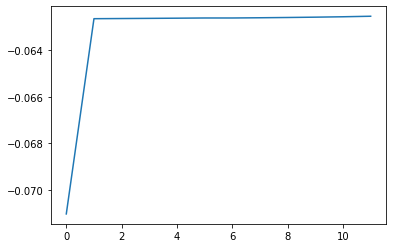

In [19]:
plt.plot(scores)

import pickle
with open("10s-50i.pck", "wb") as f:
    pickle.dump(hmm, f)

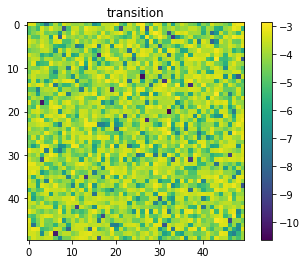

In [20]:
plt.title("transition")
plt.imshow(np.log(hmm.A))
plt.colorbar()

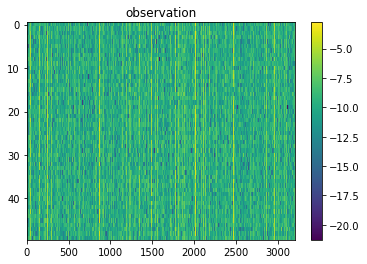

In [21]:
plt.title("observation")
plt.imshow(np.log(hmm.O), aspect='auto')
plt.colorbar()

In [11]:
HMM.probability_alphas(hmm, nummed[0], log=True)

-4.686714931458875

In [8]:
em, st = HMM.generate_emission(hmm, 140)
" ".join(toWord(wmap, em))

"full art is although to one would bred soon change time thy whether fast to to rotten not whose my correct die i the incertainty when when lie under such so with as suffer be sunset ocean you with and earth your or thee loving and thou fall shown loved i self their thou ere me more much not one here others time might a copy advantage him love many monsters them simple him their maiden it despair crests on with not out hand can rough against those discased this ill reason sit thee that bide end for beguile lends i self-willed for to to their love methinks they even as i express humble leave which neglect flame sweet mayst can out no a wounded of mine none now will i each is which admire blush delight fever deceased world's"